<a href="https://colab.research.google.com/github/tanay47/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

###Let's get straight to our analysis. We'll start by importing all must libraries first.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Mount on colab for data importing.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load and store dataset to a varible.
seo_bike_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Module 4/Capstone Project LR/Copy of SeoulBikeData.csv', encoding= 'unicode_escape')

In [4]:
seo_bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


###Our data is mounted and ready to be operated. Let's check basic information of our dataset first.

In [5]:
seo_bike_df.size

122640

In [6]:
seo_bike_df.shape

(8760, 14)

In [7]:
seo_bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

###So, we have total of "8760" observations and "14" columns. Also, we have "0" null values throughout our dataset. Though its highly unlikely to come across such datasets, here it works in our favour. Surprising right?

In [8]:
seo_bike_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


###Here we have a genaral overview of numerical features and we can already make rough estimations over it. Like,

*   Our target variable appears to have slight skwness.
*   Main factors affecting could be "hour of the day", "Rainfall", "Temperature" etc.
*   Median of each columns.
*   Differnt quartiles.
###We'll check if that's true later using EDA.





In [9]:
# check for duplicated observations.
len(seo_bike_df[seo_bike_df.duplicated()])

0

###Great, we do naot have any duplicate observations as well

###This concludes basic overview on this dataset. Now, We will analyse this dataset in detail and prepare it throughly to pass it on to different models as required.

# Exploratory Data Analysis.

###Starting EDA with univariate analysis. Checks will be performed for distribution, skewness, outliers.
###For convince we will define two variable with "dependent" and "independent" variables to list.

In [10]:
# List of dependent, independent variables.
all_columns = seo_bike_df.columns.tolist()
independent_var = list(set(all_columns) - {"Rented Bike Count"})
dependent_var = all_columns[1]
dependent_var

'Rented Bike Count'

In [11]:
# Setting fifure size.
plt.figure(figsize=(7,4))

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

In [12]:
# Removing all negetive and positive infinity values.
seo_bike_df.replace([np.inf, -np.inf], 0, inplace=True)

###Outlier treatment on numerical variable.

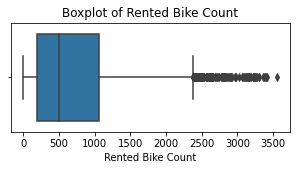

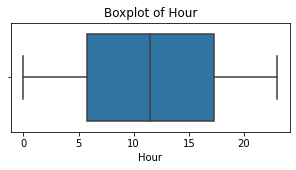

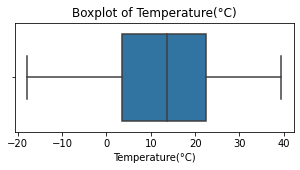

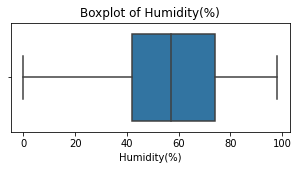

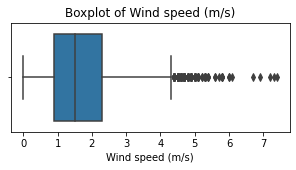

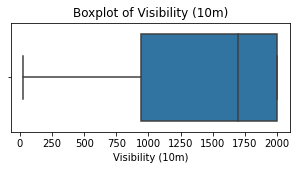

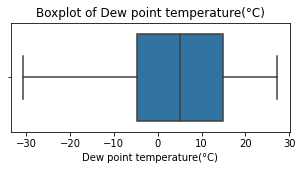

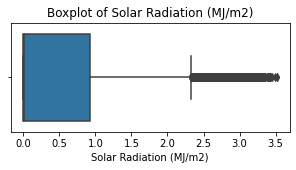

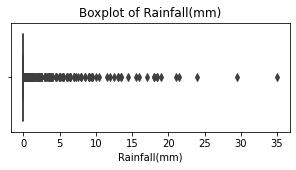

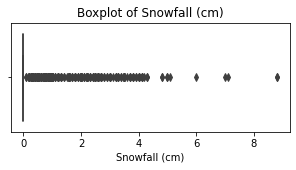

In [13]:
# Boxplot of every numerical varibles.
for var in seo_bike_df.describe().columns.tolist():
  plt.figure(figsize=(5,2))
  sns.boxplot(seo_bike_df[var])
  plt.title(f"Boxplot of {var}")
  plt.tight_layout

###We can clearly see that some variables have a lot of outliers. And we are going to treat them.

In [14]:
seo_bike_df.describe().columns.tolist()

['Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

In [15]:
# Flooring and capping of outliers.
for var in list(seo_bike_df.describe().columns.tolist()):
  q1 = np.quantile(seo_bike_df[var], 0.25)
  q3 = np.quantile(seo_bike_df[var], 0.75)
  iqr = q3 - q1
  lower_limit = q1 - (1.5*iqr)
  upper_limit = q3 + (1.5*iqr)
  seo_bike_df[var] = np.where( seo_bike_df[var] > upper_limit, seo_bike_df[var].median(), seo_bike_df[var] )
  seo_bike_df[var] = np.where( seo_bike_df[var] < lower_limit, seo_bike_df[var].median(), seo_bike_df[var] )

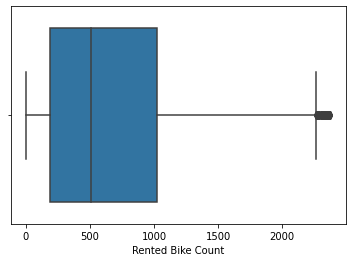

In [16]:
sns.boxplot(seo_bike_df[dependent_var])

###Great, we compressed outliers within acceptable range.

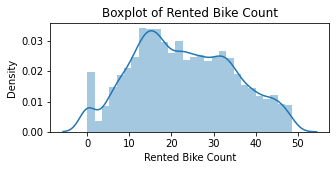

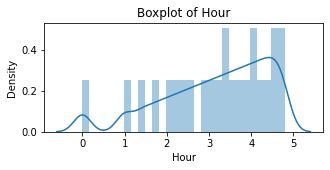

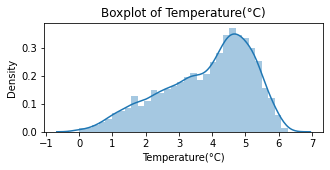

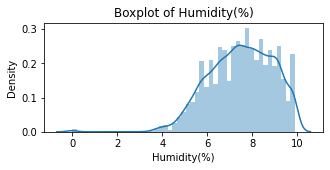

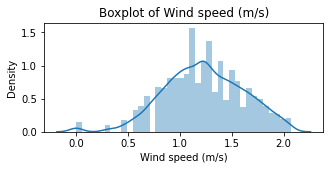

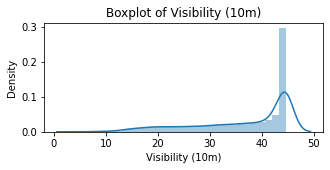

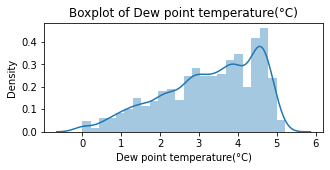

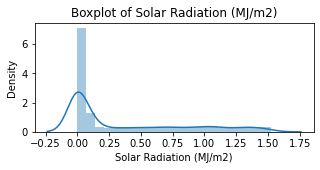

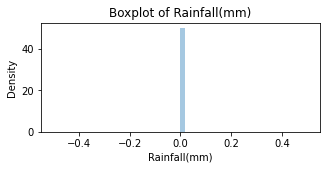

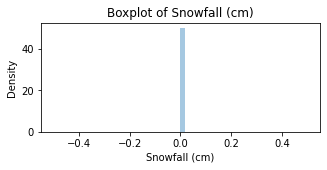

In [21]:
# Check for which transformation to use later.
for var in seo_bike_df.describe().columns.tolist():
  plt.figure(figsize=(5,2))
  sns.distplot(np.sqrt(seo_bike_df[var]))
  plt.title(f"Boxplot of {var}")

###We are going to use "squareroot" transformation for this analsis, as it best approximates to gaussion distributin for this dataset.